<a href="https://colab.research.google.com/github/xslittlemaggie/Deep-Learning-Machine-Learning-Projects/blob/master/Random_Forest_%26_Decision_Tree_LH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# Part 1: Bagging (= Bootstrap Aggregating)  & Decision Tree

## Step 1: Load data & clean data

In [8]:
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
df_wine = df_wine[df_wine["Class label"] != 1] # only choose the data when "Class label" = 2 or 3

## Step 2: Data preprocessing

#### 2.1 determine features ( Alcohol, Hue) and target for classification(class label)

In [0]:
y = df_wine["Class label"].values
X = df_wine[['Alcohol', 'Hue']].values # only choose two features for practice, it's easy for visualization

In [22]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [24]:
le = LabelEncoder()
y = le.fit_transform(y)  # transform label to 0 and 1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

#### 2.2 Split training & testing dataset

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)  # 40% for testing

## Step 3: Bagging (= Bootstrap Aggregating) & Decision Tree Model Building

#### 3.1 Create decision tree

In [0]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)

#### 3.2 Create Forest with 500 trees

In [0]:
bag = BaggingClassifier(base_estimator = tree, n_estimators = 500, 
                        max_samples = 1.0, 
                        max_features = 1.0, 
                       bootstrap_features = False,
                       n_jobs = 1,
                       random_state = 1)

#### 3.3 Evaluate the accuracy of a particular DT

In [36]:
# train the model
tree = tree.fit(x_train, y_train)

# get predictions based on the model
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

# get the accuracy for train and test datasets
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('Decision tree train/test accuracies: {:.3f}/{:.3f}'.format(tree_train, tree_test))

Decision tree train/test accuracies: 1.000/0.833


#### 3.4 Evaluate the accuracy of the bagging

In [37]:
# train the model
bag = bag.fit(x_train, y_train)

# get predictions based on the model
y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

# get the accuracy for train and test datasets
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)

print('Bagging train/test accuracies: {:.3f}/{:.3f}'.format(bag_train, bag_test))

Bagging train/test accuracies: 1.000/0.896


From the results above, with the same dataset, the bagging classifier performs better than a single Decision Tree

#### Step 4: Visualization of the different classifiers

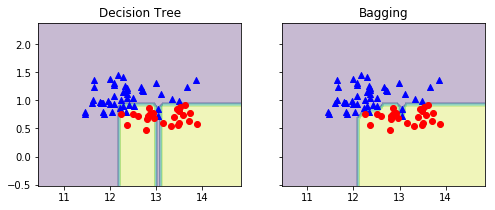

In [47]:

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8, 3))

for idx, clf, tt in zip([0, 1], [tree, bag], ['Decision Tree', 'Bagging']):
    clf.fit(x_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='blue', marker='^')
    axarr[idx].scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='red', marker='o')
    axarr[idx].set_title(tt)

plt.show()

From the plots above, the boundaries of bagging is smooth

# Part 2: Random Forest

## Step 1: Random Forests
The difference between RF and Bagging is that the RF chooses the features randomly.

1. Bootstrap (sampling with replacement)
2. Create DT for the bootstrap
  - randomly choose features  e.g. sqrt(m)  m is the total number of features
3. Repeat the process 1 and 2
4. Ensemble all the DTs for prediction
 

#### 1.1 bootstrap (sampling with replacement)

In [0]:
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 
                   'Proline']
y = df_wine['Class label'].values  # all 3 classes
X = df_wine.values[:, 1:]   # all features

y = le.fit_transform(y)  # label y values from 0 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)  # 40% for testing

## Step 2: Random Forest Model Building

In [0]:
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', 
                            max_features='sqrt', 
                            max_depth=None, 
                            min_samples_split=2, 
                            bootstrap=True, 
                            n_jobs=1, 
                            random_state=1)


In [60]:
# create the model
rf = rf.fit(x_train, y_train)

# get the predictions based on the model
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# get the accuracy
rf_train = accuracy_score(y_train, y_train_pred)
rf_test = accuracy_score(y_test, y_test_pred)

print("Random Forest train/test accuracies: {:.3f}/{:.3f}".format(rf_train, rf_test))

Random Forest train/test accuracies: 1.000/0.986


# Part 3: Boosting

## Step 1: Adaptive Boosting

#### 1.1 DT

In [64]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
tree = tree.fit(x_train, y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies: %.3f/%.3f' % (tree_train, tree_test)) # Decision tree train/test accuracies 0.915/0.896


Decision tree train/test accuracies: 0.613/0.556


#### 1.2 Boosting

In [65]:
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=1000, learning_rate=0.1, random_state=0)
ada = ada.fit(x_train, y_train)
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies: %.3f/%.3f' % (ada_train, ada_test)) # AdaBoost train/test accuracies 1.000/0.979

AdaBoost train/test accuracies: 1.000/0.958


Useful Reference:

URL_1 = "https://blog.csdn.net/xlinsist/article/details/51475345" **(DT, Bagging, RF, Boosting)**
URL_2 = "https://blog.csdn.net/wangqi880/article/details/49765673" **(bootstrap, bagging, boosting)**